In [ ]:
# only for google collab

# to use tqdm
!pip install https://github.com/chengs/tqdm/archive/colab.zip

#to save results    
from google.colab import drive
drive.mount('/content/gdrive')
import os
os.chdir("/content/gdrive/My Drive/Project:GAN/Deep_Vision_Project")


In [1]:
# used packages
import torch
import torchvision.datasets as datasets
import torchvision.transforms as transforms
import numpy as np
import matplotlib.pyplot as plt
import torchvision.transforms.functional as F

#load models
from MSG_CGAN_model import MSG_CGAN
from CGAN_model import CGAN

# load dataset
Batch_size = 100
dataset_train = datasets.CIFAR10(root='./data', train=True, download=True, transform = transforms.ToTensor())
data_loader_train = torch.utils.data.DataLoader(dataset_train, batch_size = Batch_size, shuffle = True, drop_last= True)
dataset_test = datasets.CIFAR10(root='./data', train=False, download=True, transform = transforms.ToTensor())
data_loader_test = torch.utils.data.DataLoader(dataset_test, batch_size = Batch_size, shuffle = True, drop_last=True)

Files already downloaded and verified
Files already downloaded and verified


# CGAN


In [ ]:
model = CGAN(Noise_size = 100, Label_size = 10, Channel_size = 3, \
             Picture_size = 32, Batch_size = Batch_size, use_cuda = True)

/pytorch/aten/src/ATen/native/TensorFactories.cpp:361: UserWarning: Deprecation warning: In a future PyTorch release torch.full will no longer return tensors of floating dtype by default. Instead, a bool fill_value will return a tensor of torch.bool dtype, and an integral fill_value will return a tensor of torch.long dtype. Set the optional `dtype` or `out` arguments to suppress this warning.


epoch: 0


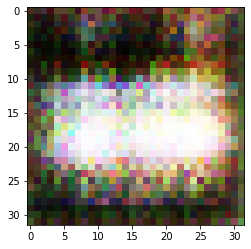

label: ship


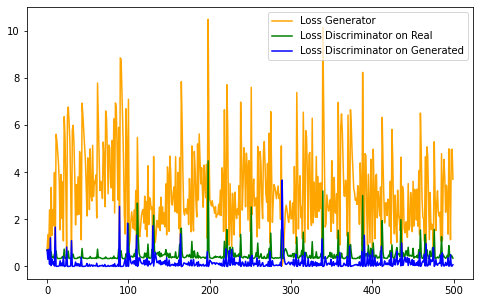

epoch: 5


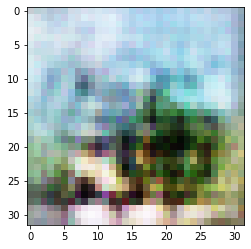

label: horse


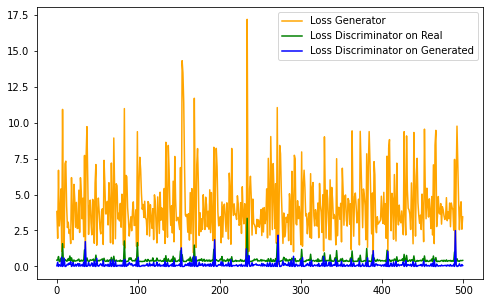

epoch: 10


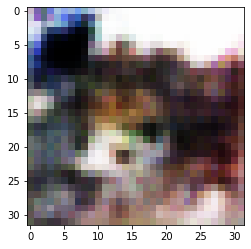

label: automobile


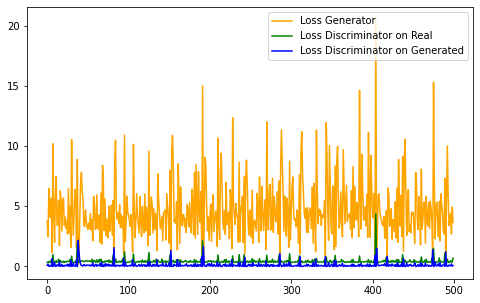

epoch: 15


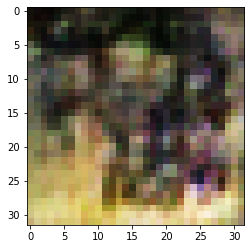

label: cat


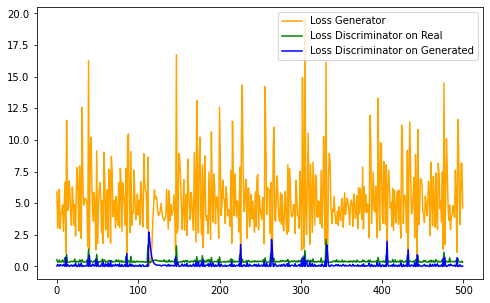

epoch: 20


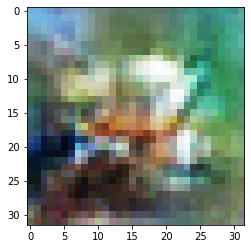

label: horse


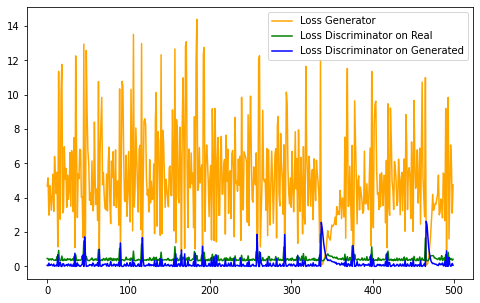

epoch: 25


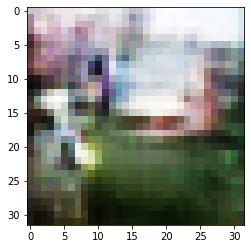

label: cat


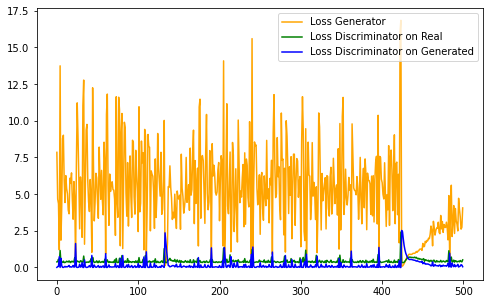

epoch: 30


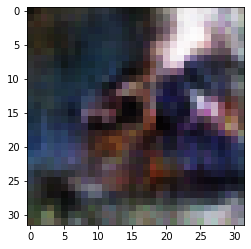

label: automobile


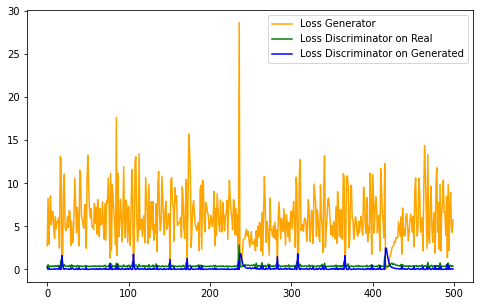

epoch: 35


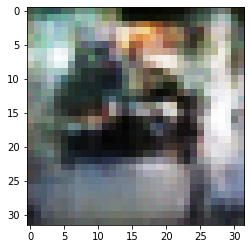

label: horse


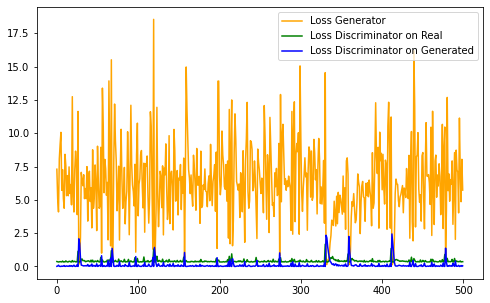

epoch: 40


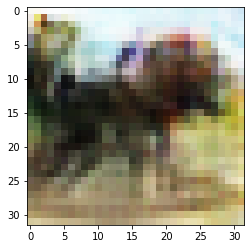

label: bird


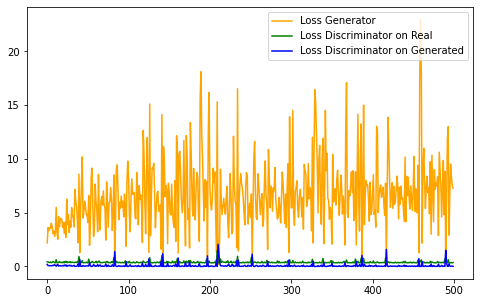

epoch: 45


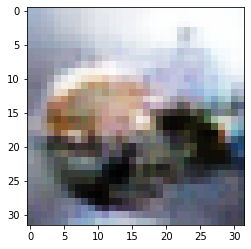

label: truck


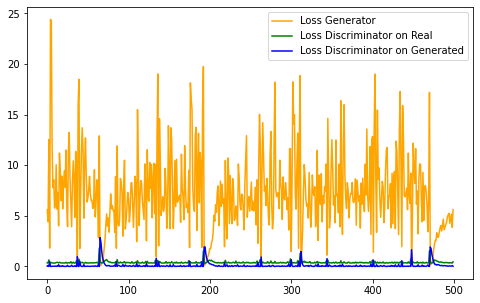

epoch: 50


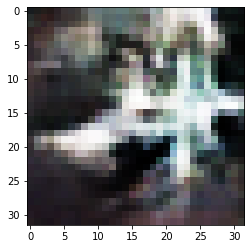

label: automobile


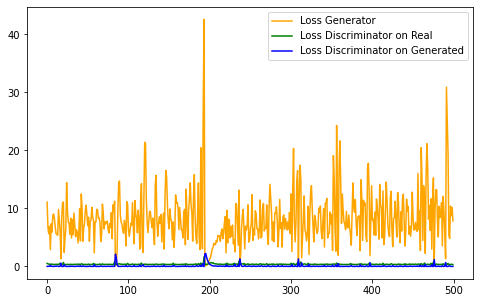

epoch: 55


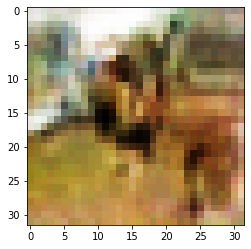

label: bird


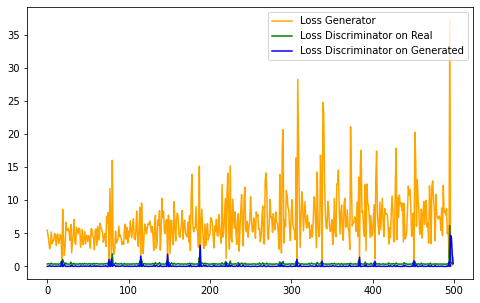

epoch: 60


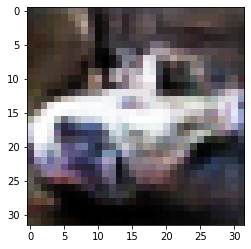

label: truck


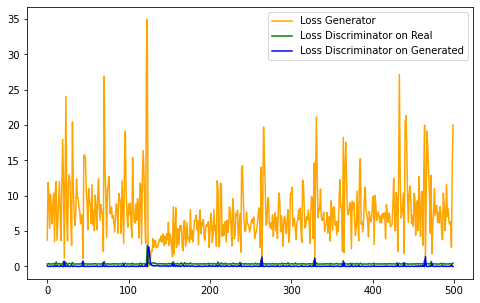

epoch: 65


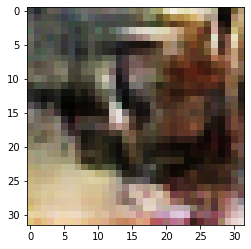

label: dog


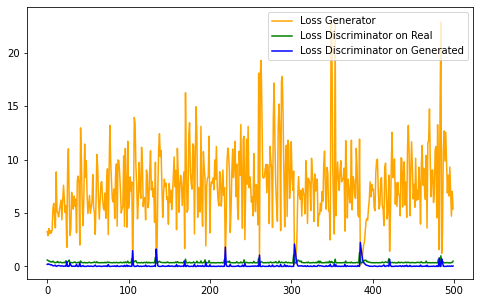

epoch: 70


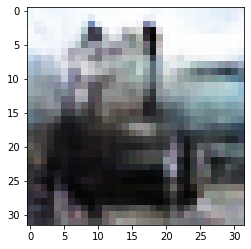

label: ship


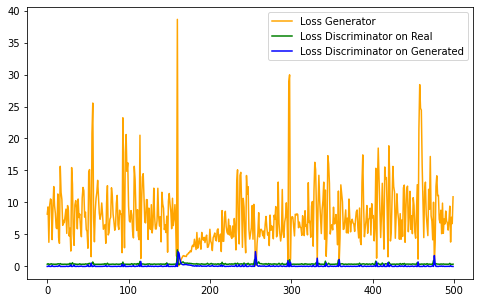

epoch: 75


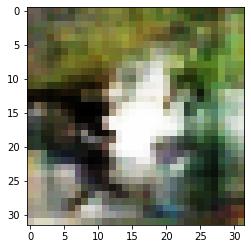

label: automobile


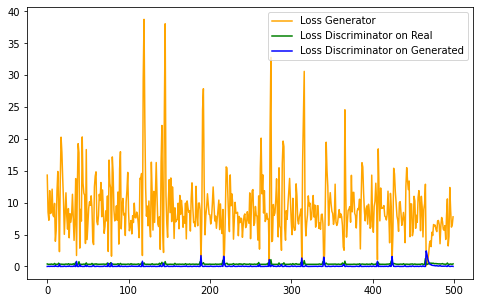

epoch: 80


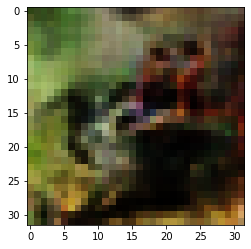

label: bird


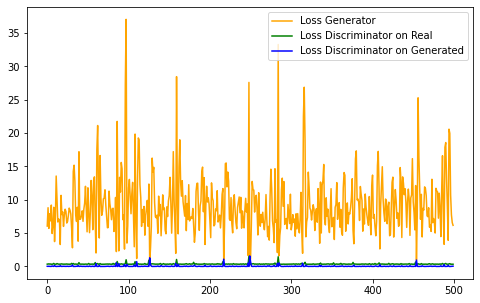

epoch: 85


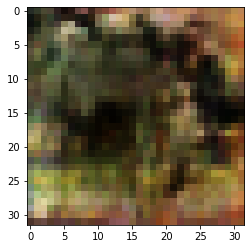

label: deer


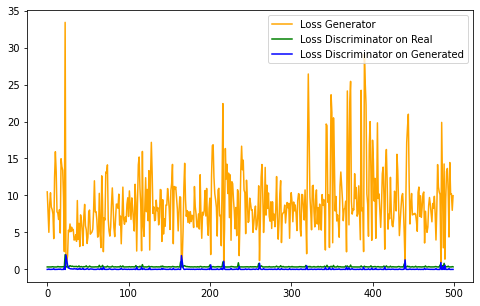

epoch: 90


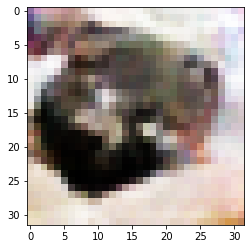

label: dog


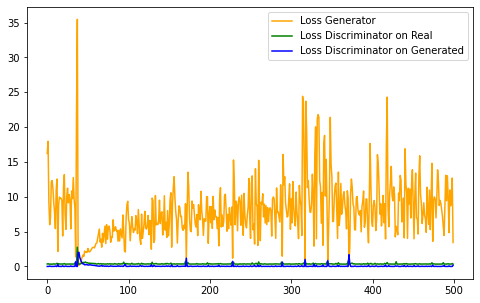

epoch: 95


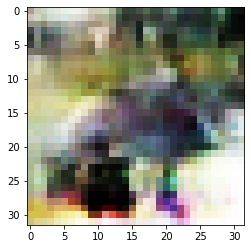

label: deer


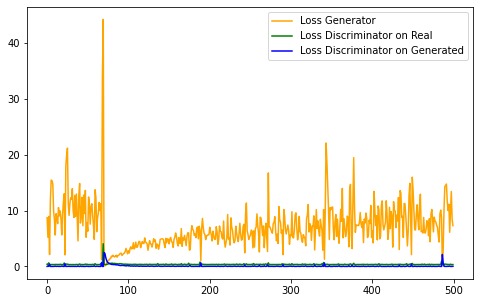

epoch: 99


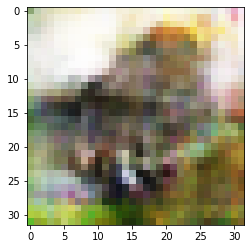

label: automobile


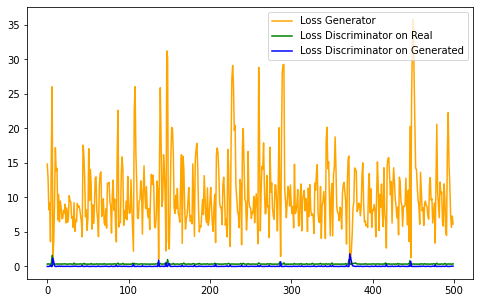

In [ ]:
model.train(num_epochs = 100, dataloader = data_loader_train)

# MSG-CGAN

In [4]:
from MSG_CGAN_model import MSG_CGAN

In [53]:
model = MSG_CGAN(Noise_size = 100, Label_size = 10, Channel_size = 3, \
                 Picture_size = 32, Batch_size = Batch_size, use_cuda = True,
                 weights_Generator = "./weights/MSG_CGAN_gen_e99.ckpt",
                 weights_Discriminator = "./weights/MSG_CGAN_disc_e99.ckpt")

/pytorch/aten/src/ATen/native/TensorFactories.cpp:361: UserWarning: Deprecation warning: In a future PyTorch release torch.full will no longer return tensors of floating dtype by default. Instead, a bool fill_value will return a tensor of torch.bool dtype, and an integral fill_value will return a tensor of torch.long dtype. Set the optional `dtype` or `out` arguments to suppress this warning.


epoch: 90


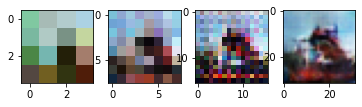

label: ship


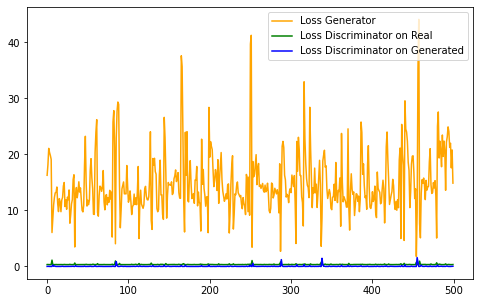

epoch: 95


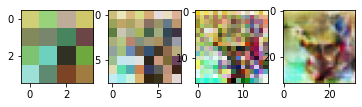

label: cat


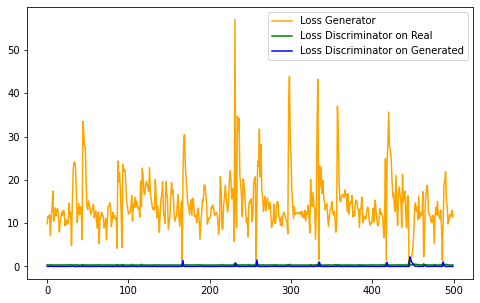

epoch: 99


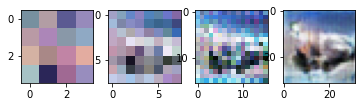

label: airplane


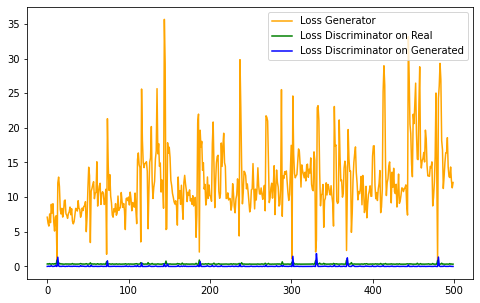

In [ ]:
model.train(num_epochs=100, dataloader= data_loader_train, already_trained_epochs= 90)

In [ ]:
import torchvision.transforms.functional as F
import matplotlib.pyplot as plt

pictures, labels = model.generate_example(100)
for j in range(100):
  plt.figure(figsize=(10,10)) 
  for i in range(4):
    ii = pictures[i][j]
    ii = ii.cpu()
    Img = F.to_pil_image(ii)
    plt.subplot(1,4, i + 1,xticks=[], yticks=[] )
    plt.imshow(Img)
  plt.tight_layout
  plt.show()
  print("label: " + model.class_names[labels[j].item()])

# MSG with different learning rate

In [3]:
from MSG_CGAN_model import MSG_CGAN

In [7]:
model = MSG_CGAN(Noise_size = 100, Label_size = 10, Channel_size = 3, \
                 Picture_size = 32, Batch_size = Batch_size, use_cuda = True,
                 lr_gen = 0.0001, lr_disc = 0.0004, spec = "diff_lr_",
                 weights_Generator = "./weights/diff_lr_MSG_CGAN_gen_e50.ckpt",
                 weights_Discriminator = "./weights/diff_lr_MSG_CGAN_disc_e50.ckpt")

epoch: 55


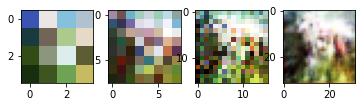

label: horse


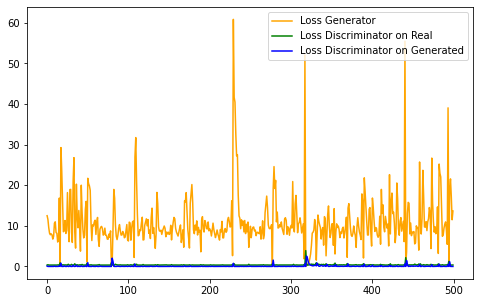

epoch: 60


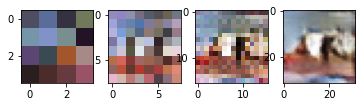

label: ship


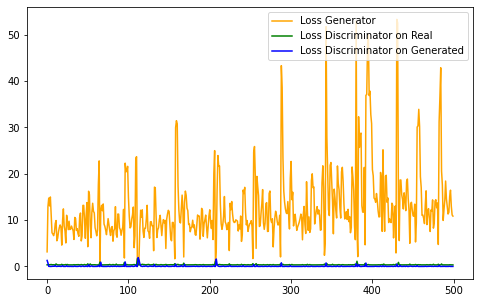

epoch: 65


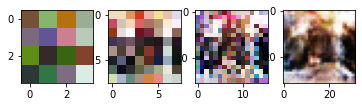

label: horse


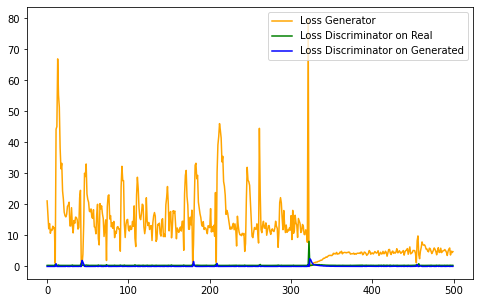

epoch: 70


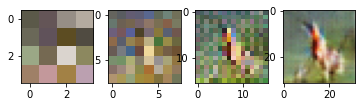

label: airplane


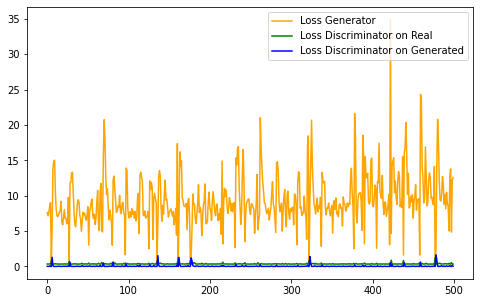

epoch: 75


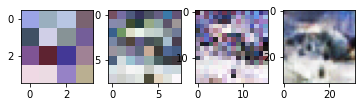

label: airplane


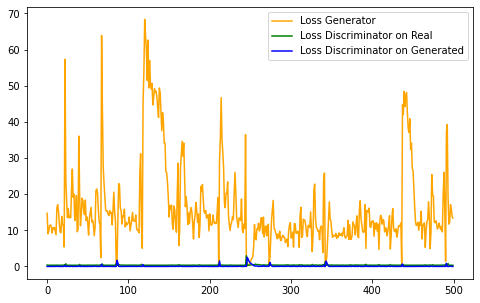

epoch: 80


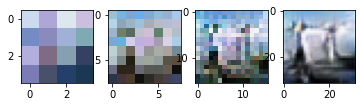

label: ship


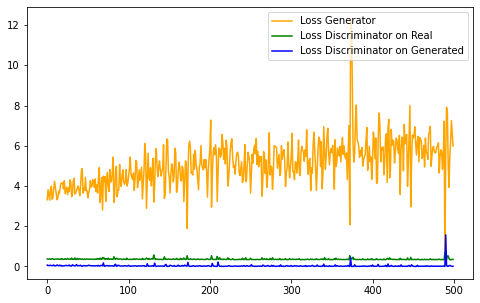

epoch: 85


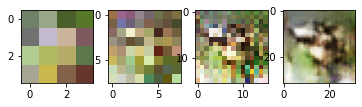

label: frog


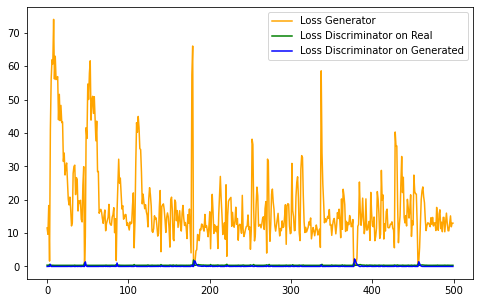

epoch: 90


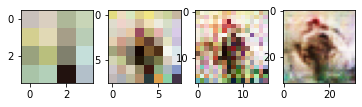

label: bird


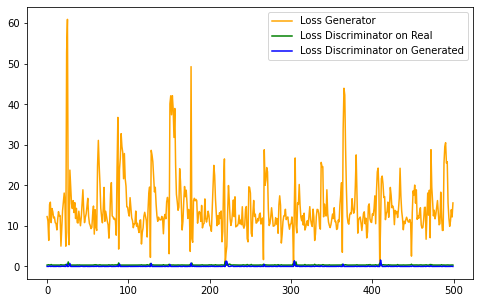

epoch: 95


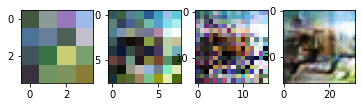

label: automobile


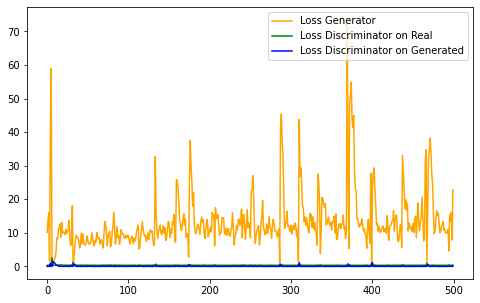

epoch: 99


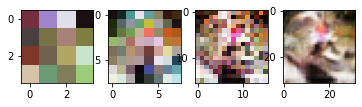

label: truck


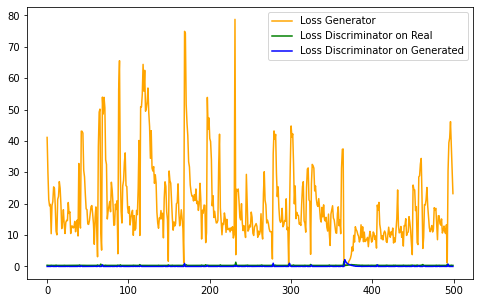

In [8]:
model.train(num_epochs=100, dataloader= data_loader_train , feedback_freq= 5, already_trained_epochs= 51)

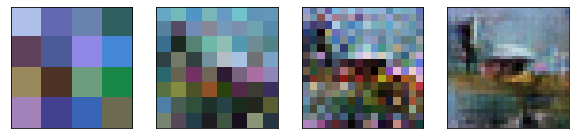

label: ship


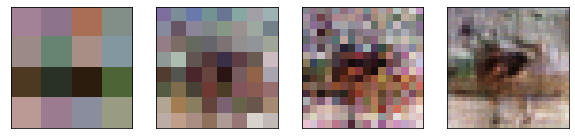

label: dog


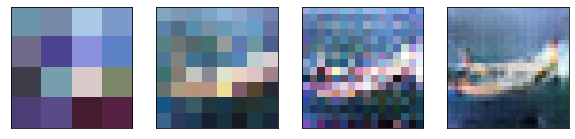

label: ship


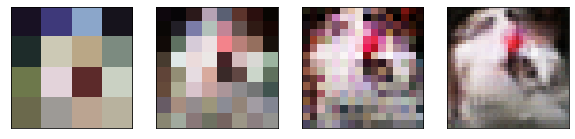

label: horse


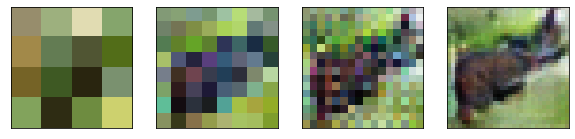

label: deer


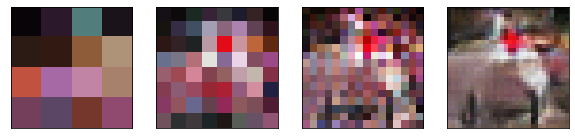

label: deer


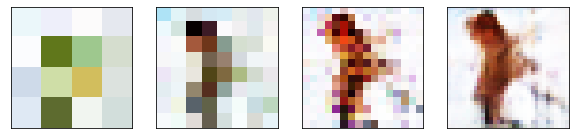

label: frog


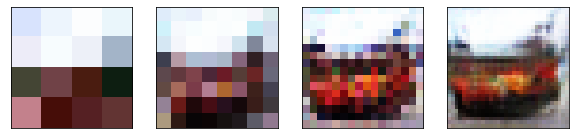

label: automobile


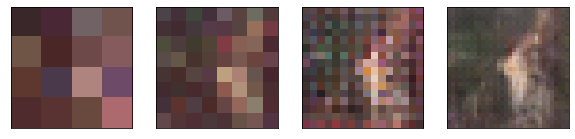

label: dog


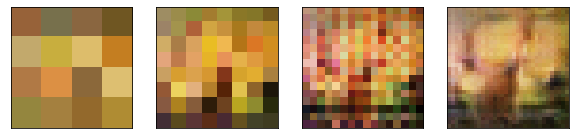

label: bird


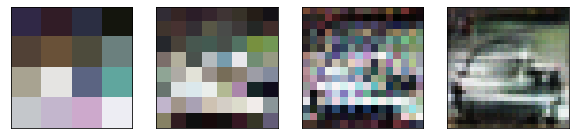

label: truck


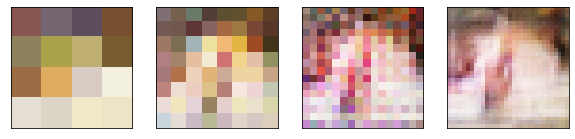

label: dog


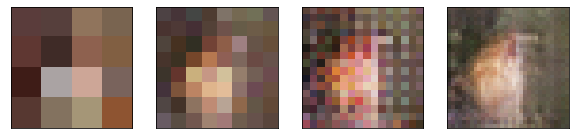

label: dog


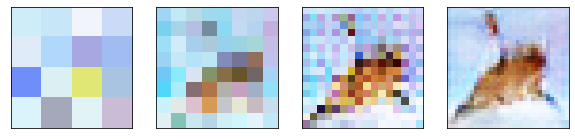

label: deer


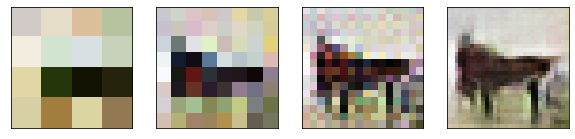

label: horse


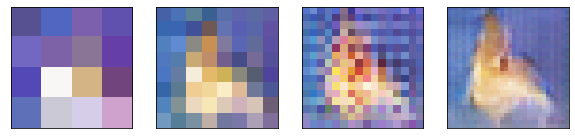

label: deer


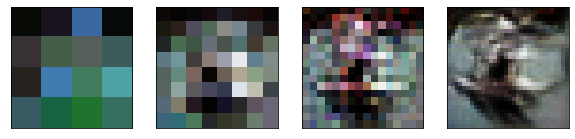

label: truck


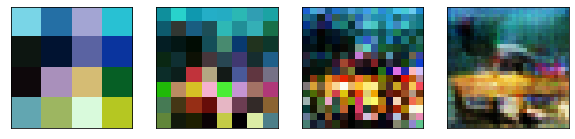

label: truck


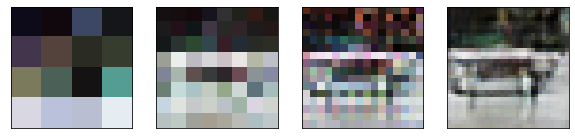

label: truck


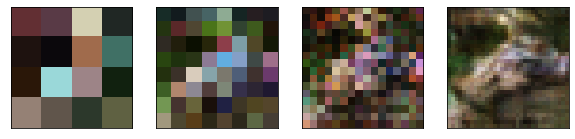

label: bird


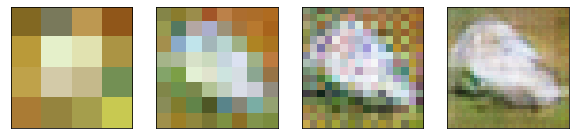

label: bird


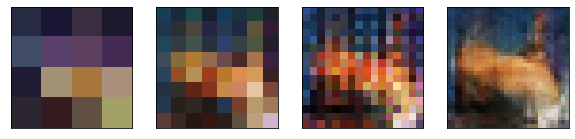

label: frog


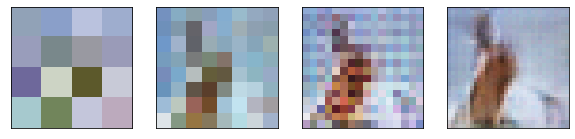

label: horse


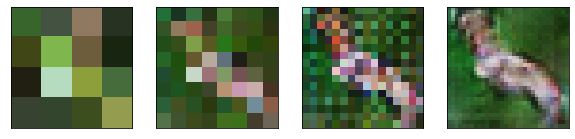

label: cat


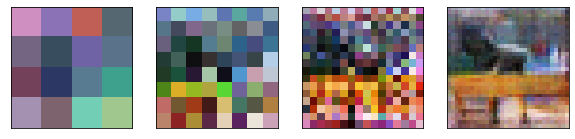

label: deer


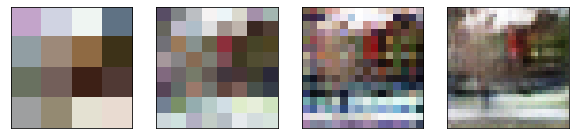

label: cat


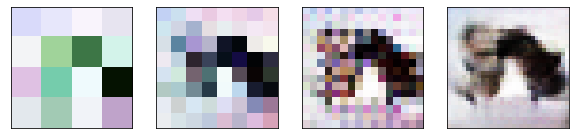

label: ship


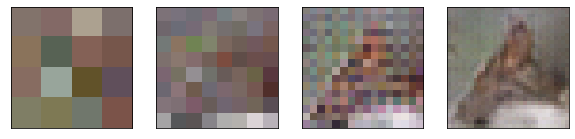

label: cat


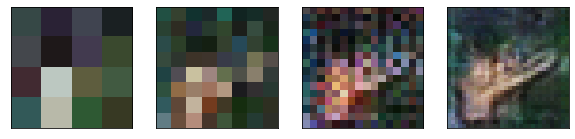

label: frog


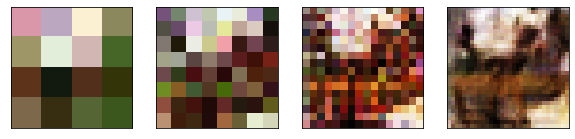

label: frog


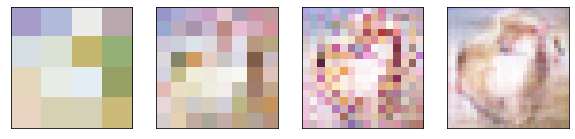

label: deer


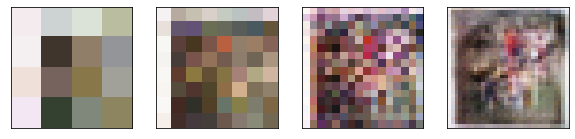

label: frog


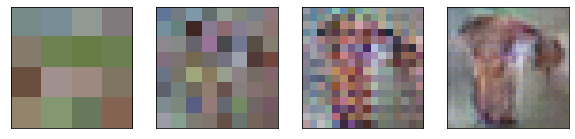

label: horse


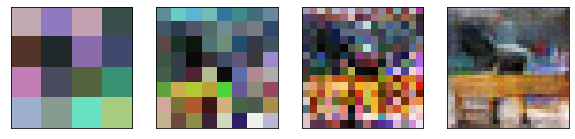

label: cat


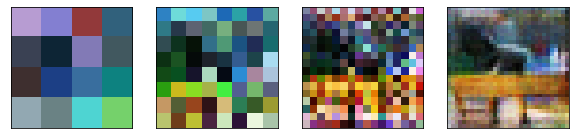

label: dog


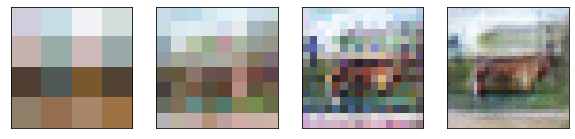

label: horse


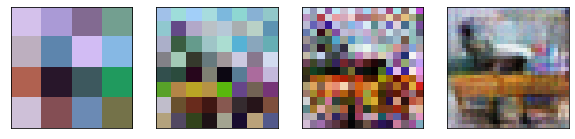

label: ship


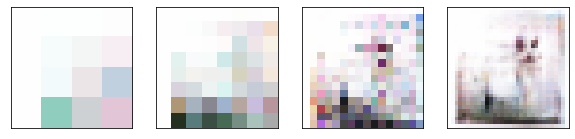

label: airplane


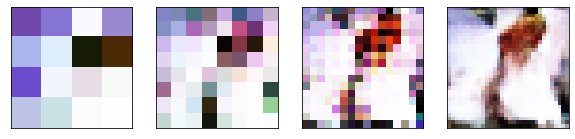

label: bird


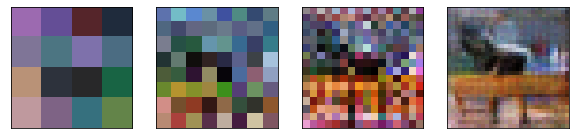

label: horse


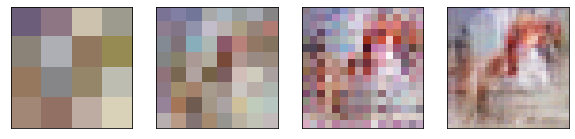

label: cat


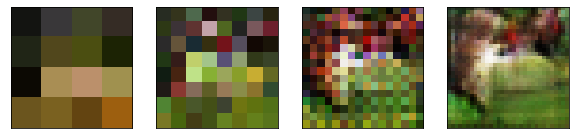

label: cat


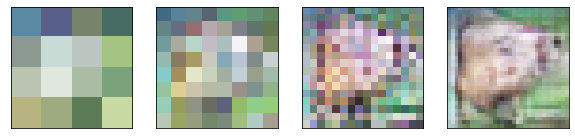

label: bird


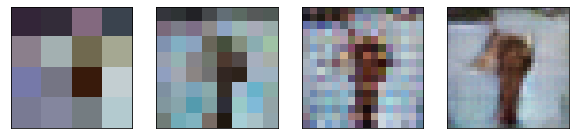

label: bird


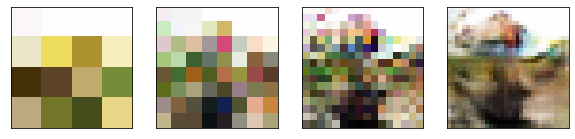

label: truck


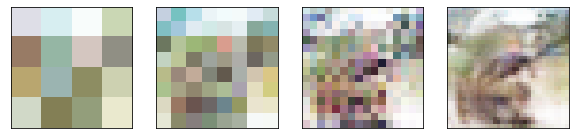

label: cat


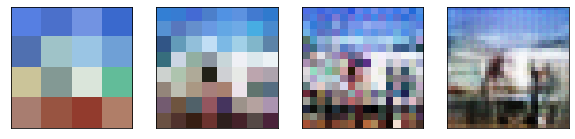

label: truck


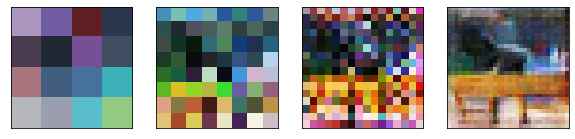

label: frog


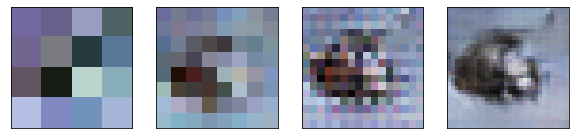

label: truck


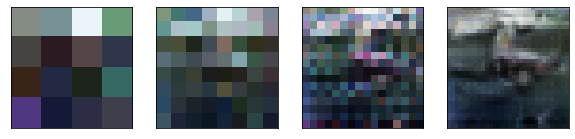

label: ship


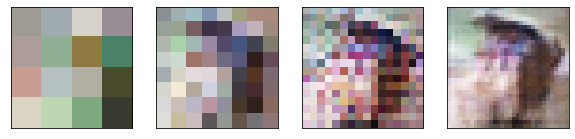

label: cat


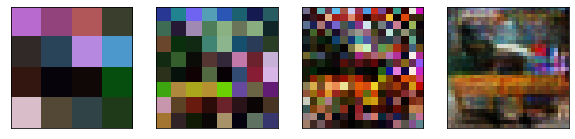

label: truck


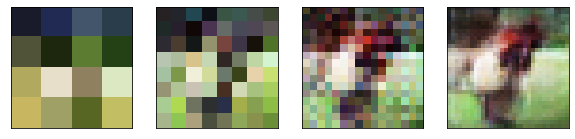

label: deer


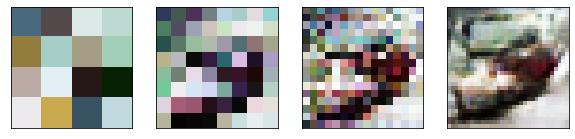

label: truck


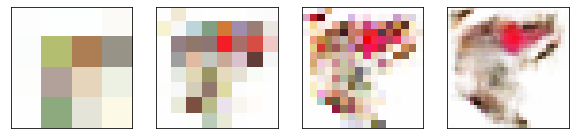

label: cat


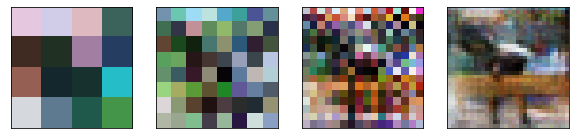

label: dog


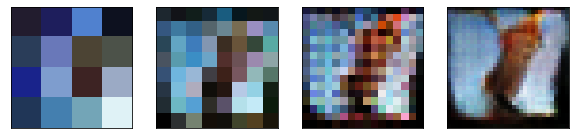

label: bird


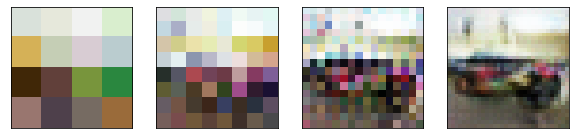

label: ship


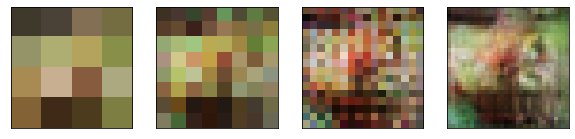

label: frog


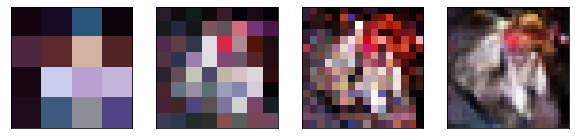

label: cat


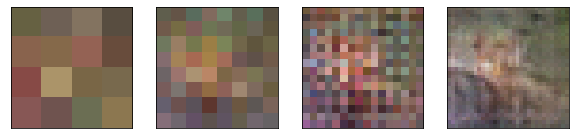

label: frog


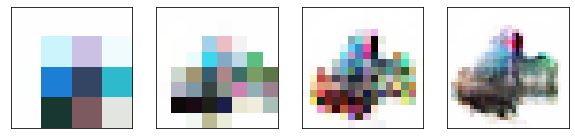

label: truck


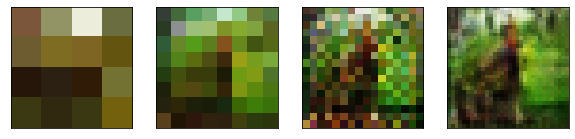

label: frog


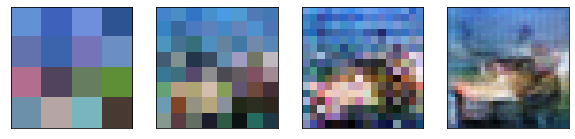

label: ship


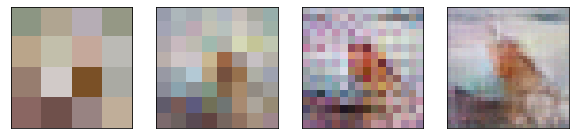

label: bird


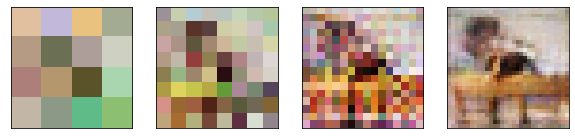

label: frog


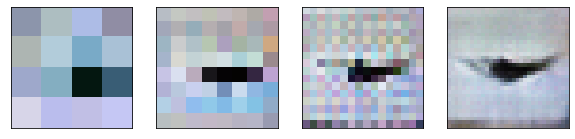

label: airplane


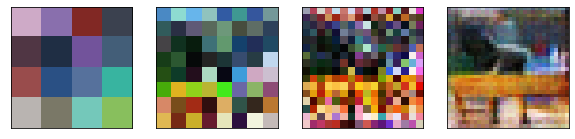

label: frog


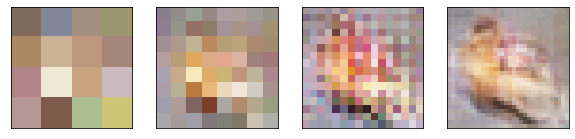

label: deer


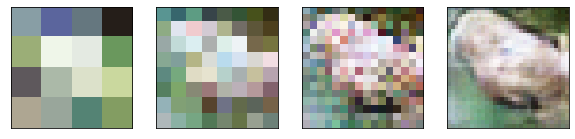

label: horse


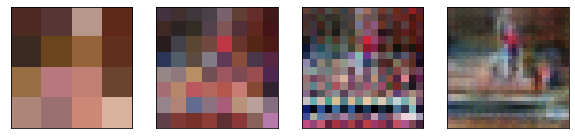

label: cat


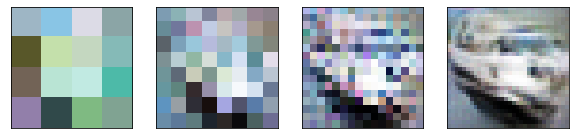

label: truck


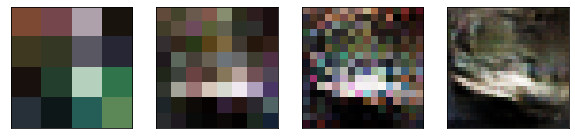

label: ship


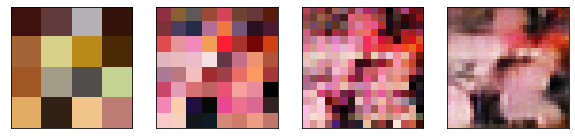

label: airplane


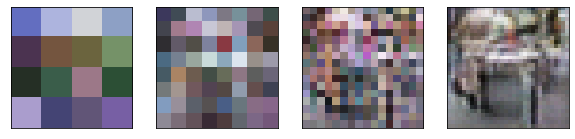

label: automobile


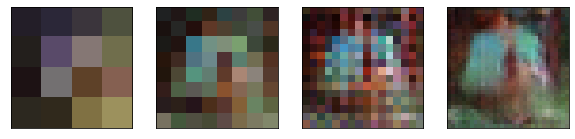

label: deer


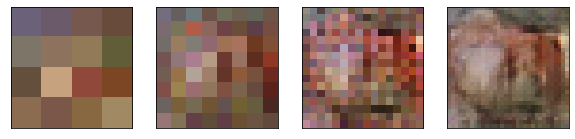

label: frog


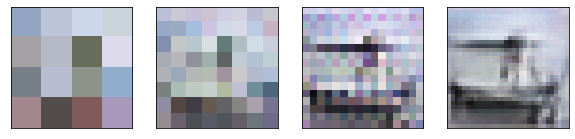

label: automobile


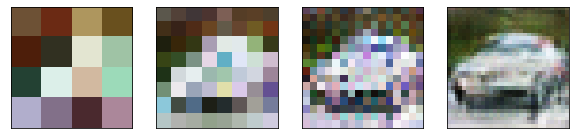

label: truck


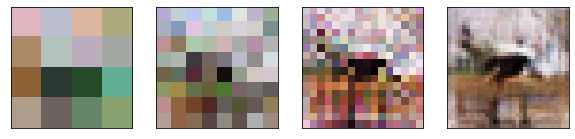

label: dog


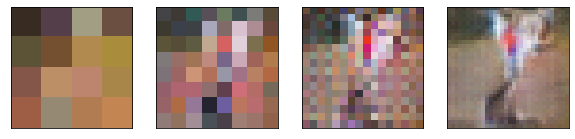

label: bird


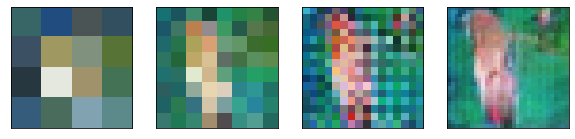

label: dog


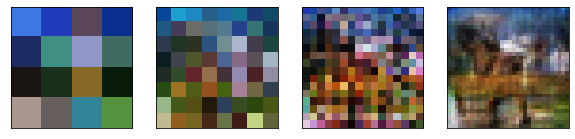

label: bird


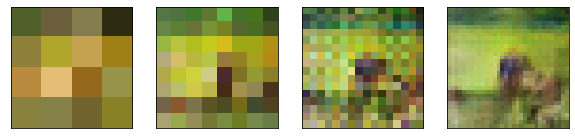

label: dog


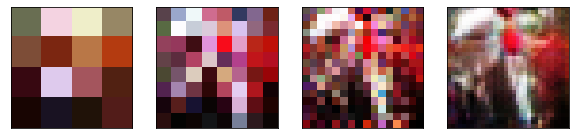

label: bird


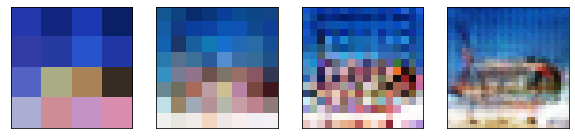

label: airplane


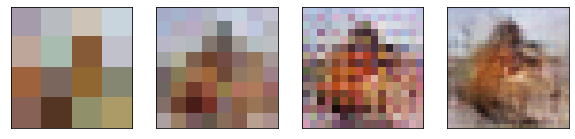

label: cat


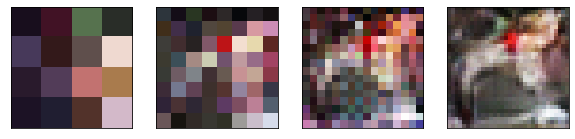

label: deer


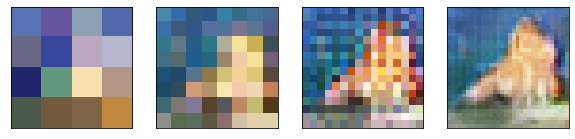

label: horse


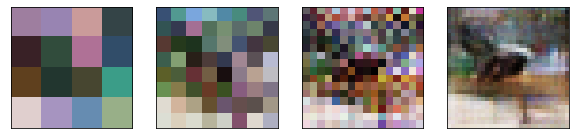

label: bird


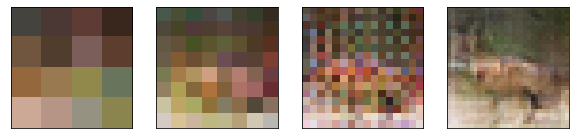

label: frog


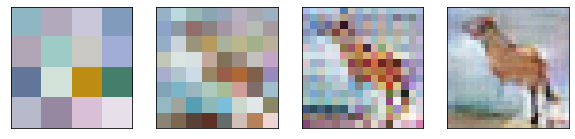

label: bird


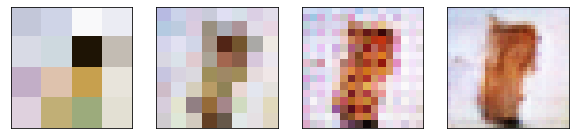

label: dog


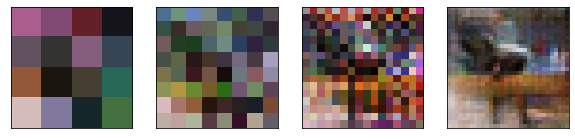

label: cat


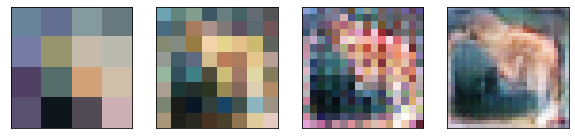

label: cat


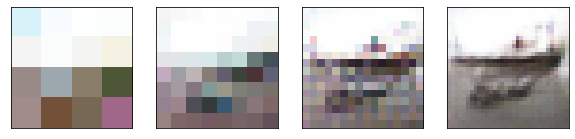

label: ship


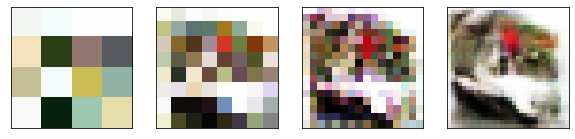

label: automobile


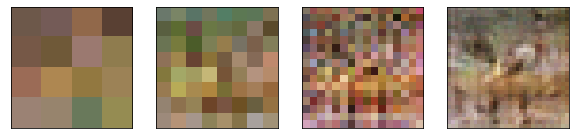

label: frog


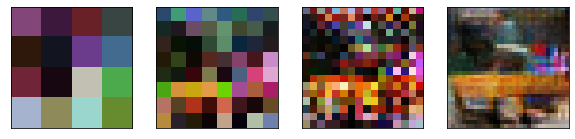

label: truck


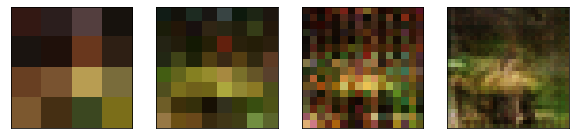

label: deer


In [10]:

pictures, labels = model.generate_example(100)
for j in range(100):
  plt.figure(figsize=(10,10)) 
  for i in range(4):
    ii = pictures[i][j]
    ii = ii.cpu()
    Img = F.to_pil_image(ii)
    plt.subplot(1,4, i + 1,xticks=[], yticks=[] )
    plt.imshow(Img)
  plt.tight_layout
  plt.show()
  print("label: " + model.class_names[labels[j].item()])

# MSG-CGAN with even tinier learning rate

In [4]:
model = MSG_CGAN(Noise_size = 100, Label_size = 10, Channel_size = 3, \
                 Picture_size = 32, Batch_size = Batch_size, use_cuda = False,
                 lr_gen = 0.00005, lr_disc = 0.0002, spec = "tinier_lr_",
                 weights_Generator = "./weights/tinier_lr_MSG_CGAN_gen_e60.ckpt",
                 weights_Discriminator = "./weights/tinier_lr_MSG_CGAN_disc_e60.ckpt")

In [5]:
model.train(num_epochs=100, dataloader= data_loader_train, feedback_freq= 10, already_trained_epochs = 61)

../aten/src/ATen/native/TensorFactories.cpp:361: UserWarning: Deprecation warning: In a future PyTorch release torch.full will no longer return tensors of floating dtype by default. Instead, a bool fill_value will return a tensor of torch.bool dtype, and an integral fill_value will return a tensor of torch.long dtype. Set the optional `dtype` or `out` arguments to suppress this warning.


KeyboardInterrupt: 

# Graphics

In [3]:
from MSG_CGAN_model import MSG_CGAN
from CGAN_model import CGAN

In [4]:
model_0_e0 = CGAN(Noise_size = 100, Label_size = 10, Channel_size = 3, \
                 Picture_size = 32, Batch_size = Batch_size, use_cuda = False,
                 weights_Generator = "./weights/CGAN_gen_e0.ckpt",
                 weights_Discriminator = "./weights/CGAN_disc_e0.ckpt")
model_0_e20 = CGAN(Noise_size = 100, Label_size = 10, Channel_size = 3, \
                 Picture_size = 32, Batch_size = Batch_size, use_cuda = False,
                 weights_Generator = "./weights/CGAN_gen_e20.ckpt",
                 weights_Discriminator = "./weights/CGAN_disc_e20.ckpt")
model_0_e40 = CGAN(Noise_size = 100, Label_size = 10, Channel_size = 3, \
                 Picture_size = 32, Batch_size = Batch_size, use_cuda = False,
                 weights_Generator = "./weights/CGAN_gen_e40.ckpt",
                 weights_Discriminator = "./weights/CGAN_disc_e40.ckpt")
model_0_e60 = CGAN(Noise_size = 100, Label_size = 10, Channel_size = 3, \
                 Picture_size = 32, Batch_size = Batch_size, use_cuda = False,
                 weights_Generator = "./weights/CGAN_gen_e60.ckpt",
                 weights_Discriminator = "./weights/CGAN_disc_e60.ckpt")
model_0_e80 = CGAN(Noise_size = 100, Label_size = 10, Channel_size = 3, \
                 Picture_size = 32, Batch_size = Batch_size, use_cuda = False,
                 weights_Generator = "./weights/CGAN_gen_e80.ckpt",
                 weights_Discriminator = "./weights/CGAN_disc_e80.ckpt")
model_0_e99 = CGAN(Noise_size = 100, Label_size = 10, Channel_size = 3, \
                 Picture_size = 32, Batch_size = Batch_size, use_cuda = False,
                 weights_Generator = "./weights/CGAN_gen_e99.ckpt",
                 weights_Discriminator = "./weights/CGAN_disc_e99.ckpt")

In [5]:
model_1_e0 = MSG_CGAN(Noise_size = 100, Label_size = 10, Channel_size = 3, \
                 Picture_size = 32, Batch_size = Batch_size, use_cuda = False,
                 weights_Generator = "./weights/MSG_CGAN_gen_e0.ckpt",
                 weights_Discriminator = "./weights/MSG_CGAN_disc_e0.ckpt")
model_1_e20 = MSG_CGAN(Noise_size = 100, Label_size = 10, Channel_size = 3, \
                 Picture_size = 32, Batch_size = Batch_size, use_cuda = False,
                 weights_Generator = "./weights/MSG_CGAN_gen_e20.ckpt",
                 weights_Discriminator = "./weights/MSG_CGAN_disc_e20.ckpt")
model_1_e40 = MSG_CGAN(Noise_size = 100, Label_size = 10, Channel_size = 3, \
                 Picture_size = 32, Batch_size = Batch_size, use_cuda = False,
                 weights_Generator = "./weights/MSG_CGAN_gen_e40.ckpt",
                 weights_Discriminator = "./weights/MSG_CGAN_disc_e40.ckpt")
model_1_e60 = MSG_CGAN(Noise_size = 100, Label_size = 10, Channel_size = 3, \
                 Picture_size = 32, Batch_size = Batch_size, use_cuda = False,
                 weights_Generator = "./weights/MSG_CGAN_gen_e60.ckpt",
                 weights_Discriminator = "./weights/MSG_CGAN_disc_e60.ckpt")
model_1_e80 = MSG_CGAN(Noise_size = 100, Label_size = 10, Channel_size = 3, \
                 Picture_size = 32, Batch_size = Batch_size, use_cuda = False,
                 weights_Generator = "./weights/MSG_CGAN_gen_e80.ckpt",
                 weights_Discriminator = "./weights/MSG_CGAN_disc_e80.ckpt")
model_1_e99 = MSG_CGAN(Noise_size = 100, Label_size = 10, Channel_size = 3, \
                 Picture_size = 32, Batch_size = Batch_size, use_cuda = False,
                 weights_Generator = "./weights/MSG_CGAN_gen_e99.ckpt",
                 weights_Discriminator = "./weights/MSG_CGAN_disc_e99.ckpt")

In [6]:
model_2_e0 = MSG_CGAN(Noise_size = 100, Label_size = 10, Channel_size = 3, \
                 Picture_size = 32, Batch_size = Batch_size, use_cuda = False,
                 weights_Generator = "./weights/diff_lr_MSG_CGAN_gen_e0.ckpt",
                 weights_Discriminator = "./weights/diff_lr_MSG_CGAN_disc_e0.ckpt")
model_2_e20 = MSG_CGAN(Noise_size = 100, Label_size = 10, Channel_size = 3, \
                 Picture_size = 32, Batch_size = Batch_size, use_cuda = False,
                 weights_Generator = "./weights/diff_lr_MSG_CGAN_gen_e20.ckpt",
                 weights_Discriminator = "./weights/diff_lr_MSG_CGAN_disc_e20.ckpt")
model_2_e40 = MSG_CGAN(Noise_size = 100, Label_size = 10, Channel_size = 3, \
                 Picture_size = 32, Batch_size = Batch_size, use_cuda = False,
                 weights_Generator = "./weights/diff_lr_MSG_CGAN_gen_e40.ckpt",
                 weights_Discriminator = "./weights/diff_lr_MSG_CGAN_disc_e40.ckpt")
model_2_e60 = MSG_CGAN(Noise_size = 100, Label_size = 10, Channel_size = 3, \
                 Picture_size = 32, Batch_size = Batch_size, use_cuda = False,
                 weights_Generator = "./weights/diff_lr_MSG_CGAN_gen_e60.ckpt",
                 weights_Discriminator = "./weights/diff_lr_MSG_CGAN_disc_e60.ckpt")
model_2_e80 = MSG_CGAN(Noise_size = 100, Label_size = 10, Channel_size = 3, \
                 Picture_size = 32, Batch_size = Batch_size, use_cuda = False,
                 weights_Generator = "./weights/diff_lr_MSG_CGAN_gen_e80.ckpt",
                 weights_Discriminator = "./weights/diff_lr_MSG_CGAN_disc_e80.ckpt")
model_2_e99 = MSG_CGAN(Noise_size = 100, Label_size = 10, Channel_size = 3, \
                 Picture_size = 32, Batch_size = Batch_size, use_cuda = False,
                 weights_Generator = "./weights/diff_lr_MSG_CGAN_gen_e99.ckpt",
                 weights_Discriminator = "./weights/diff_lr_MSG_CGAN_disc_e99.ckpt")

In [7]:
model_0_list = [model_0_e0, model_0_e20, model_0_e40, model_0_e60, model_0_e80, model_0_e99]
model_1_list = [model_1_e0, model_1_e20, model_1_e40, model_1_e60, model_1_e80, model_1_e99]
model_2_list = [model_2_e0, model_2_e20, model_2_e40, model_2_e60, model_2_e80, model_2_e99]


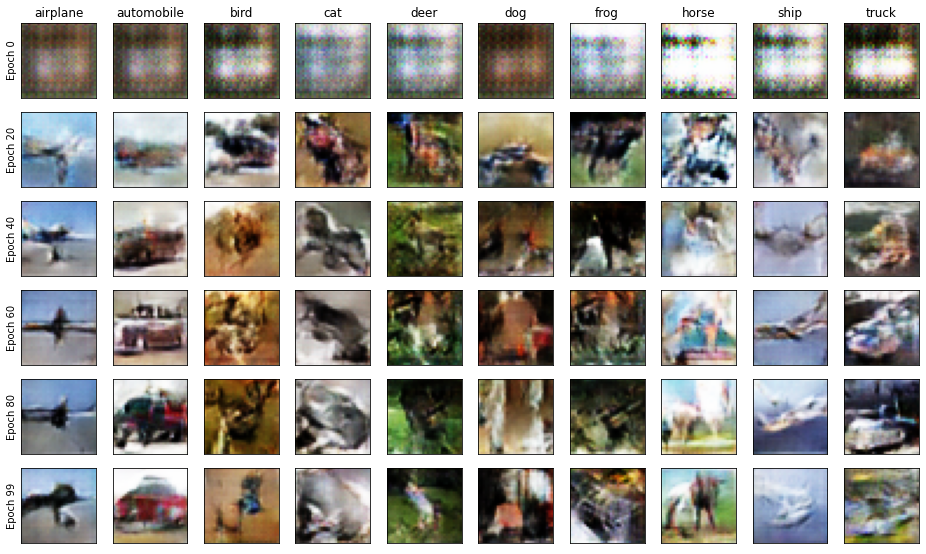

In [91]:
def reset_seeds(n):
    #random.seed(n)
    np.random.seed(n)
    torch.manual_seed(n)

reset_seeds(42)

noise = torch.randn(size = (10, 100))
categories = torch.tensor(range(10))

fig, axe = plt.subplots(6, 10, figsize=(10*1.3,6*1.3))
for i in range(6):
    pictures = model_0_list[i].generate_example_nr(noise, categories)
    for j in range(10):
        if i == 0:
            axe[i,j].set_title(model_0_e0.class_names[j])
        img = pictures[j]
        img = img.cpu()
        img = F.to_pil_image(img)
        axe[i,j].imshow(img)
        #axe[i,j].axis('off')
        
        if j == 0:
            axe[i,j].set(ylabel=f"Epoch {[0,20,40,60,80,99][i]}")
fig.figsize=(10,10)
plt.setp(axe, xticks=[], xticklabels=[],
        yticks=[])
plt.tight_layout()
plt.savefig('model_0_vgl.png')
plt.show()

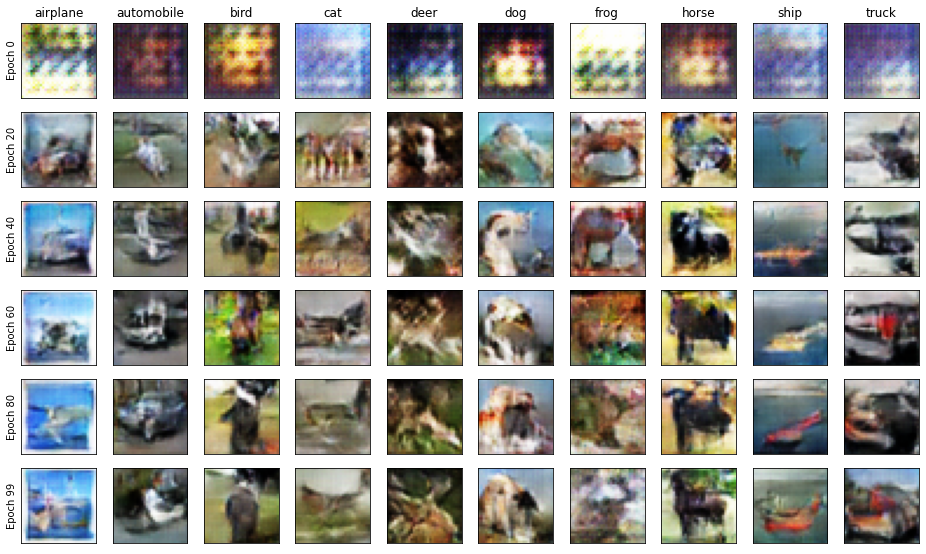

In [92]:
def reset_seeds(n):
    #random.seed(n)
    np.random.seed(n)
    torch.manual_seed(n)

reset_seeds(42)

noise = torch.randn(size = (10, 100))
categories = torch.tensor(range(10))

fig, axe = plt.subplots(6, 10, figsize=(10*1.3,6*1.3))
for i in range(6):
    pictures = model_1_list[i].generate_example_nr(noise, categories)
    for j in range(10):
        if i == 0:
            axe[i,j].set_title(model_0_e0.class_names[j])
        img = pictures[3][j]
        img = img.cpu()
        img = F.to_pil_image(img)
        axe[i,j].imshow(img)
        #axe[i,j].axis('off')
        
        if j == 0:
            axe[i,j].set(ylabel=f"Epoch {[0,20,40,60,80,99][i]}")
fig.figsize=(10,10)
plt.setp(axe, xticks=[], xticklabels=[],
        yticks=[])
plt.tight_layout()
plt.savefig('model_1_vgl.png')
plt.show()

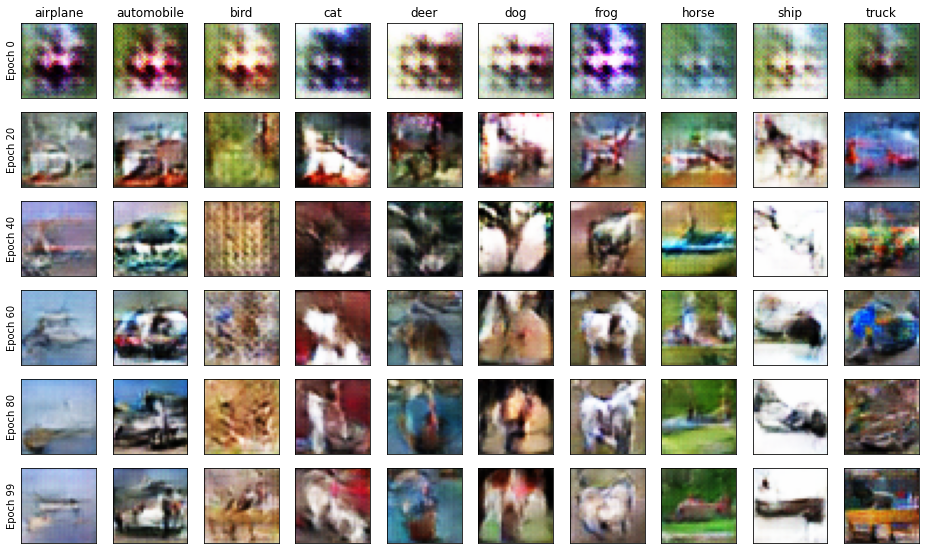

In [93]:
def reset_seeds(n):
    #random.seed(n)
    np.random.seed(n)
    torch.manual_seed(n)

reset_seeds(420)

noise = torch.randn(size = (10, 100))
categories = torch.tensor(range(10))

fig, axe = plt.subplots(6, 10, figsize=(10*1.3,6*1.3))
for i in range(6):
    pictures = model_2_list[i].generate_example_nr(noise, categories)
    for j in range(10):
        if i == 0:
            axe[i,j].set_title(model_0_e0.class_names[j])
        img = pictures[3][j]
        img = img.cpu()
        img = F.to_pil_image(img)
        axe[i,j].imshow(img)
        #axe[i,j].axis('off')
        
        if j == 0:
            axe[i,j].set(ylabel=f"Epoch {[0,20,40,60,80,99][i]}")
fig.figsize=(10,10)
plt.setp(axe, xticks=[], xticklabels=[],
        yticks=[])
plt.tight_layout()
plt.savefig('model_2_vgl.png')
plt.show()

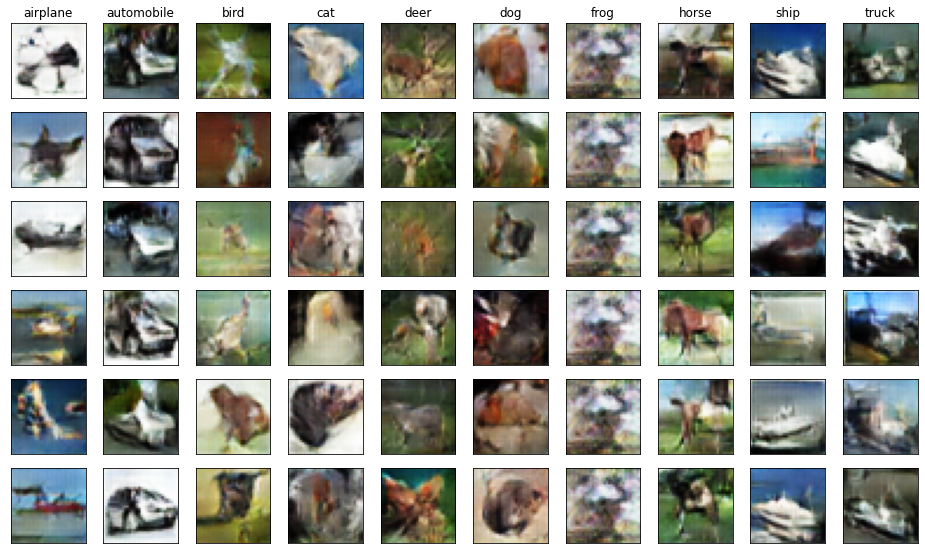

In [95]:
def reset_seeds(n):
    #random.seed(n)
    np.random.seed(n)
    torch.manual_seed(n)

reset_seeds(42)

noise = torch.randn(size = (10, 100))
categories = torch.tensor(range(10))

fig, axe = plt.subplots(6, 10, figsize=(10*1.3,6*1.3))
for i in range(6):
    noise = torch.randn(size = (10, 100))
    pictures = model_1_list[5].generate_example_nr(noise, categories)
    for j in range(10):
        if i == 0:
            axe[i,j].set_title(model_0_e0.class_names[j])
        img = pictures[3][j]
        img = img.cpu()
        img = F.to_pil_image(img)
        axe[i,j].imshow(img)
        #axe[i,j].axis('off')
        
        #if j == 0:
        #    axe[i,j].set(ylabel=f"Epoch {[0,20,40,60,80,99][i]}")
fig.figsize=(10,10)
plt.setp(axe, xticks=[], xticklabels=[],
        yticks=[])
plt.tight_layout()
plt.savefig('model_1_diff_outcomes.png')
plt.show()

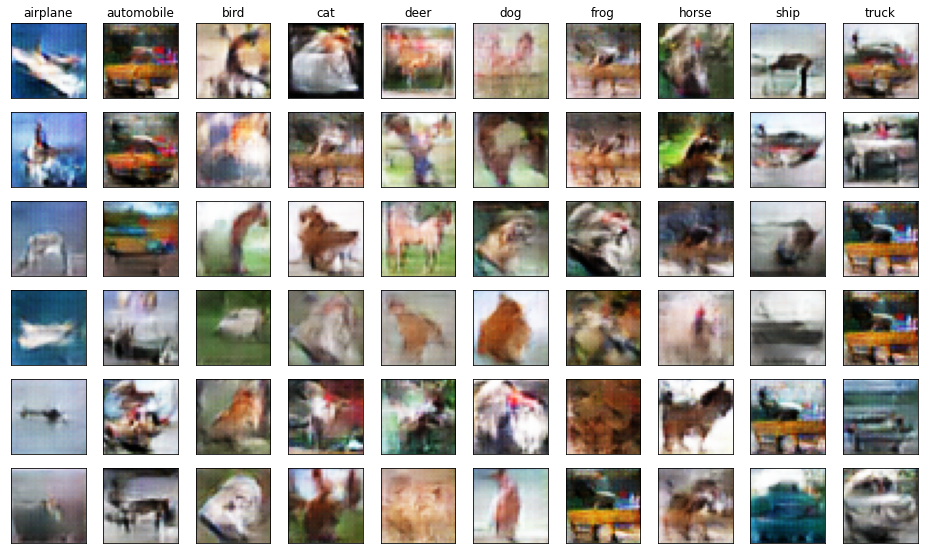

In [96]:
def reset_seeds(n):
    #random.seed(n)
    np.random.seed(n)
    torch.manual_seed(n)

reset_seeds(42)

noise = torch.randn(size = (10, 100))
categories = torch.tensor(range(10))

fig, axe = plt.subplots(6, 10, figsize=(10*1.3,6*1.3))
for i in range(6):
    noise = torch.randn(size = (10, 100))
    pictures = model_2_list[5].generate_example_nr(noise, categories)
    for j in range(10):
        if i == 0:
            axe[i,j].set_title(model_0_e0.class_names[j])
        img = pictures[3][j]
        img = img.cpu()
        img = F.to_pil_image(img)
        axe[i,j].imshow(img)
        #axe[i,j].axis('off')
        
        #if j == 0:
        #    axe[i,j].set(ylabel=f"Epoch {[0,20,40,60,80,99][i]}")
fig.figsize=(10,10)
plt.setp(axe, xticks=[], xticklabels=[],
        yticks=[])
plt.tight_layout()
plt.savefig('model_2_diff_outcomes.png')
plt.show()

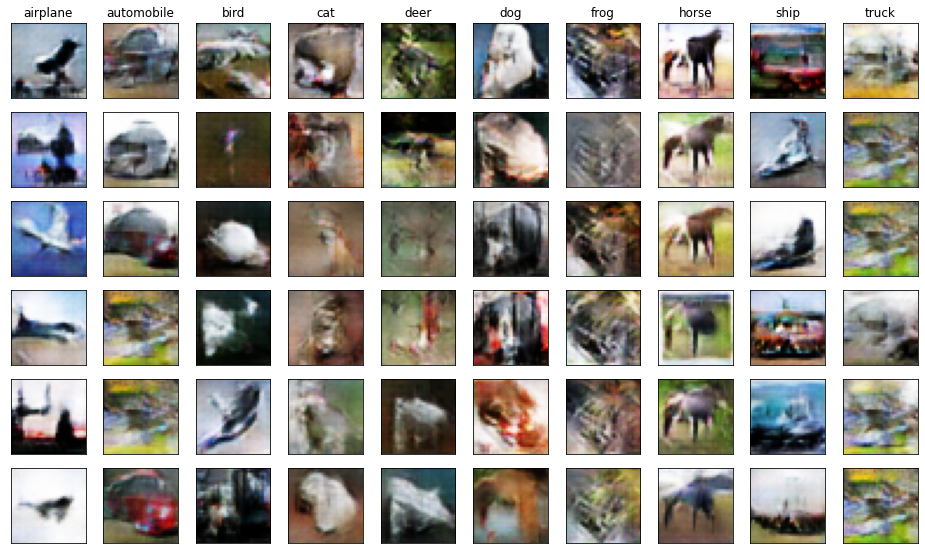

In [97]:
def reset_seeds(n):
    #random.seed(n)
    np.random.seed(n)
    torch.manual_seed(n)

reset_seeds(42)

noise = torch.randn(size = (10, 100))
categories = torch.tensor(range(10))

fig, axe = plt.subplots(6, 10, figsize=(10*1.3,6*1.3))
for i in range(6):
    noise = torch.randn(size = (10, 100))
    pictures = model_0_list[5].generate_example_nr(noise, categories)
    for j in range(10):
        if i == 0:
            axe[i,j].set_title(model_0_e0.class_names[j])
        img = pictures[j]
        img = img.cpu()
        img = F.to_pil_image(img)
        axe[i,j].imshow(img)
        #axe[i,j].axis('off')
        
        #if j == 0:
        #    axe[i,j].set(ylabel=f"Epoch {[0,20,40,60,80,99][i]}")
fig.figsize=(10,10)
plt.setp(axe, xticks=[], xticklabels=[],
        yticks=[])
plt.tight_layout()
plt.savefig('model_0_diff_outcomes.png')
plt.show()

# Inception Score

In [8]:
from inception_score import inception_score
from tqdm.auto import tqdm

In [9]:
# get samples
#sample_cifar = dataset_test
#sample_model_0 = model_0_e99.generate_example(10000)[0]
#sample_model_1 = model_1_e99.generate_example(10000)[0]
#sample_model_2 = model_2_e99.generate_example(10000)[0]

In [39]:
is_cifar = []
for batch, _ in tqdm(data_loader_test):
    is_cifar.append(inception_score(batch, cuda=False, batch_size=32, resize=True, splits=10))

In [14]:
is_model_0 = []
for i in tqdm(range(20)):
    pics = model_0_e99.generate_example(500)[0]
    is_model_0.append(inception_score(pics, cuda=False, batch_size=32, resize=True, splits=10))

In [21]:
np.mean(is_model_0, axis = 0)

array([3.06867184, 0.25456776])

In [32]:
for a in model_1_e99.generate_example(17):
    for b in a:
        #print(b.shape)
        pass
model_0_e99.generate_example(17)[0][3].shape

torch.Size([3, 32, 32])

In [33]:
is_model_1 = []
for i in tqdm(range(20)):
    pics = model_1_e99.generate_example(500)[0][3]
    is_model_1.append(inception_score(pics, cuda=False, batch_size=32, resize=True, splits=10))

/usr/local/lib/python3.8/site-packages/torch/nn/functional.py:2970: UserWarning: Default upsampling behavior when mode=bilinear is changed to align_corners=False since 0.4.0. Please specify align_corners=True if the old behavior is desired. See the documentation of nn.Upsample for details.
  warnings.warn("Default upsampling behavior when mode={} is changed "
/Users/carlasagebiel/Documents/Studium/Deep Vision/Deep_Vision_Project/inception_score.py:45: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.softmax(x).data.cpu().numpy()


In [34]:
is_model_2 = []
for i in tqdm(range(20)):
    pics = model_2_e99.generate_example(500)[0][3]
    is_model_2.append(inception_score(pics, cuda=False, batch_size=32, resize=True, splits=10))

In [37]:
np.mean(is_model_1, 0)

array([2.79971285, 0.24831102])

In [38]:
np.mean(is_model_2, 0)

array([2.83516005, 0.23022683])

In [40]:
is_model_0_2 = []
for i in tqdm(range(20)):
    pics = model_0_e99.generate_example(500)[0]
    is_model_0_2.append(inception_score(pics* 2 -1, cuda=False, batch_size=32, resize=True, splits=10))

In [45]:
np.mean(is_cifar, 0)

array([3.33261781, 0.50519764])

In [46]:
np.mean(is_model_0_2,0)

array([3.63636788, 0.31826353])

In [47]:
is_model_1_2 = []
for i in tqdm(range(20)):
    pics = model_1_e99.generate_example(500)[0][3]
    is_model_1_2.append(inception_score(pics* 2 -1, cuda=False, batch_size=32, resize=True, splits=10))

KeyboardInterrupt: 

In [48]:
np.mean(is_model_1_2, 0)

array([3.82908493, 0.33864929])

In [50]:
is_model_2_2 = []
for i in tqdm(range(20)):
    pics = model_2_e99.generate_example(500)[0][3]
    is_model_2_2.append(inception_score(pics* 2 -1, cuda=False, batch_size=32, resize=True, splits=10))

In [51]:
np.mean(is_model_2_2,0)

array([3.73161003, 0.3303022 ])

In [53]:
is_cifar_2 = []
for batch, _ in tqdm(data_loader_test):
    is_cifar_2.append(inception_score(batch*2 -1, cuda=False, batch_size=32, resize=True, splits=10))

KeyboardInterrupt: 

In [54]:
np.mean(is_cifar_2, 0)

array([4.21075427, 0.59141041])

In [56]:
! ./fid_score.py  path/to/dataset2

usage: fid_score.py [-h] [--batch-size BATCH_SIZE] [--dims {64,192,768,2048}]
                    [-c GPU]
                    path path
fid_score.py: error: the following arguments are required: path
